<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "final_dataset.csv")

---


# Test Environment


In [4]:
import pandas as pd

# Specify the file path of the CSV file
file_path = "final_dataset.csv"

# Read the CSV file into a pandas data frame
df = pd.read_csv(file_path)

# Print the first 5 rows of the dataframe
print(df.head())

<ipython-input-4-d6917b8f8ac9>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [5]:
import pandas as pd
import numpy as np

# 1. Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

# 2. Replace missing values with the mean of the column
for column in missing_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# 3. Delete duplicate entries
df.drop_duplicates(inplace=True)

# Display the modified DataFrame
print(df)

Columns with missing values: ['tax']


<ipython-input-5-e7f6dcc1e3c8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

       price  
0      12000  
1      14

In [6]:
import pandas as pd

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get the correlation values with respect to 'price'
price_corr = correlation_matrix['price']

# Identify the top 5 attributes with highest correlation to price
top_5_corr = price_corr.abs().nlargest(6).index[1:]  # exclude 'price' itself

print("Top 5 attributes with highest correlation to price:")
print(top_5_corr)

Top 5 attributes with highest correlation to price:
Index(['year', 'mileage', 'engineSize', 'tax', 'mpg'], dtype='object')


In [7]:
import pandas as pd

# Count the number of entries for each unique value in the 'fuelType' column
fuel_type_counts = df['fuelType'].value_counts()

# Display the results
print("Counts of each unique fuelType:")
print(fuel_type_counts)

Counts of each unique fuelType:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


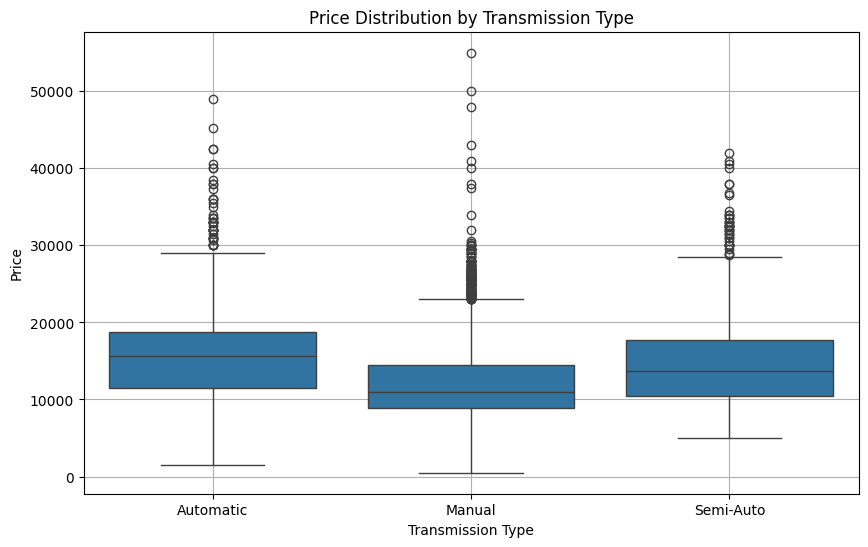

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Adding titles and labels
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

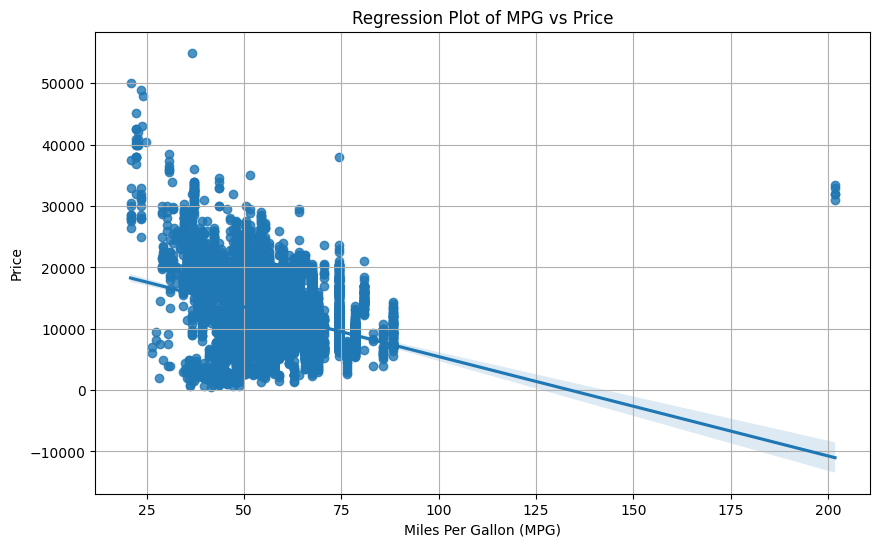

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)

# Adding titles and labels
plt.title('Regression Plot of MPG vs Price')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['mpg']]  # Feature
y = df['price']  # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display the results
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

R²: 0.1198980224962416
Mean Squared Error: 19741690.809446193


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display the results
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

R²: 0.7265379654547005
Mean Squared Error: 6134065.224381731


In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Create a pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline model
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display the results
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

R²: 0.7666619695239302
Mean Squared Error: 5234038.06546274


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with a regularization parameter of 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R² using the test data
r2 = r2_score(y_test, y_pred)

# Display the result
print(f'R²: {r2}')

R²: 0.6917134446113138


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial feature transformer of degree 2
poly = PolynomialFeatures(degree=2)

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Ridge regression model with a regularization parameter of 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on the modified training data
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the modified test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R² and MSE using the modified test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R²: 0.6732748888228912
Mean Squared Error: 7326174.516559619


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Prepare the data
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial feature transformer and Ridge regression model in a pipeline
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

# Set the alpha values for Grid Search
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_alpha = grid_search.best_params_['ridge__alpha']
best_score = grid_search.best_score_

# Display the results
print(f'Best alpha: {best_alpha}')
print(f'Best cross-validated score: {best_score}')

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best alpha: 0.01
Best cross-validated score: 0.7735031602542886


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
